<a href="https://colab.research.google.com/github/LaouedjSaid/Checkpoint02_ANN_Bank_Accuracy0-73with10layers.ipynb/blob/main/Checkpoint02_ANN_Bank_Final02_Accuracy0_73with10layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.callbacks import EarlyStopping
 # Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=2)] 

In [ ]:
### Importing the dataset and showing the head of the dataset
import pandas as pd
df=pd.read_csv("/content/sample_data/bank.csv", sep = ',')
# select four columns by title according to heat map
dS=df[['duration','housing','poutcome','deposit']]
dS

,duration,housing,poutcome,deposit
0,1042,yes,unknown,yes
1,1467,no,unknown,yes
2,1389,yes,unknown,yes
3,579,yes,unknown,yes
4,673,no,unknown,yes
...,...,...,...,...
11157,257,yes,unknown,no
11158,83,no,unknown,no
11159,156,no,unknown,no
11160,9,no,failure,no


In [ ]:
print(dS['duration'].unique(),dS['housing'].unique(),dS['poutcome'].unique(),dS['deposit'].unique())

[1042 1467 1389 ... 1504  818 1812] ['yes' 'no'] ['unknown' 'other' 'failure' 'success'] ['yes' 'no']


In [ ]:
#  at first, let's convert categorical columns to numerical format
#Create a new dictionary cleanup_nums to group these titles into more useful ones.

cleanup_nums=({"housing" : {"no":"no_housing","yes":"yes_housing"},"deposit" : {"no":"0","yes":"1"}})
dS.replace(cleanup_nums,inplace=True)
dS

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,duration,housing,poutcome,deposit
0,1042,yes_housing,unknown,1
1,1467,no_housing,unknown,1
2,1389,yes_housing,unknown,1
3,579,yes_housing,unknown,1
4,673,no_housing,unknown,1
...,...,...,...,...
11157,257,yes_housing,unknown,0
11158,83,no_housing,unknown,0
11159,156,no_housing,unknown,0
11160,9,no_housing,failure,0


### Convert all the categorical data  into numerical values

In [ ]:
### Convert all the data of housing into numerical values

one_hot=pd.get_dummies(dS['housing'])
dS=dS.drop('housing',axis=1)
dS=dS.join(one_hot)

### Convert all the data of poutcome into numerical values
one_hot=pd.get_dummies(dS['poutcome'])
dS=dS.drop('poutcome',axis=1)
dS=dS.join(one_hot)

### Convert all the data of deposit into numerical values
# one_hot=pd.get_dummies(dS['deposit'])
# dS=dS.drop('deposit',axis=1)
# dS=dS.join(one_hot)
dS

,duration,deposit,no_housing,yes_housing,failure,other,success,unknown
0,1042,1,0,1,0,0,0,1
1,1467,1,1,0,0,0,0,1
2,1389,1,0,1,0,0,0,1
3,579,1,0,1,0,0,0,1
4,673,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
11157,257,0,0,1,0,0,0,1
11158,83,0,1,0,0,0,0,1
11159,156,0,1,0,0,0,0,1
11160,9,0,1,0,1,0,0,0


In [ ]:
# Normalize
dS
dS['duration'] = dS['duration']/ dS['duration'].max()
print(dS['duration'].max())


1.0


In [ ]:
dS

,duration,deposit,no_housing,yes_housing,failure,other,success,unknown
0,0.268488,1,0,1,0,0,0,1
1,0.377995,1,1,0,0,0,0,1
2,0.357897,1,0,1,0,0,0,1
3,0.149188,1,0,1,0,0,0,1
4,0.173409,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
11157,0.066220,0,0,1,0,0,0,1
11158,0.021386,0,1,0,0,0,0,1
11159,0.040196,0,1,0,0,0,0,1
11160,0.002319,0,1,0,1,0,0,0


In [ ]:
dS_input = dS[['duration','no_housing','yes_housing','failure','other','success','unknown']]
dS_output = dS[['deposit']]
print(dS_input.shape,dS_output.shape, type(dS_input), type(dS_output))

(11162, 7) (11162, 1) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_input = dS_input.iloc[-2000: , :]# images  
validation_output = dS_output.iloc[-2000:] # labels


# Construct a training set from the first 50000 images and labels.
train_input = dS_input.iloc[:7000 , :] # images
train_output =  dS_output.iloc[:7000]  # labels

# Construct a testing set from the first 50000 images and labels.
test_input = dS_input.iloc[7001:9162 , :] # images
test_output = dS_output.iloc[7001:9162 , :] # images


# Convert all elements to numeracal data & dataframe to numpyarray.

train_input = np.asarray(train_input).astype('float32')   # int64
train_output = np.asarray(train_output).astype('float32')  # int64


validation_input = np.asarray(validation_input).astype('float32') # int64
validation_output = np.asarray(validation_output).astype('float32')  # int64

test_input = np.asarray(test_input).astype('float32') # int64
test_output = np.asarray(test_output).astype('float32')  # int64



print(validation_input.shape,train_input.shape,test_input.shape, type(validation_input), type(train_input), type(test_input))
print(validation_output.shape,train_output.shape,test_output.shape, type(validation_output), type(train_output), type(test_output))


(2000, 7) (7000, 7) (2161, 7) <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2000, 1) (7000, 1) (2161, 1) <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
validation_input

array([[0.03839217, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03864983, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01906725, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04019583, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00231899, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16181396, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [ ]:
validation_output

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
train_input

array([[0.2684875 , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37799537, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35789746, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.09662458, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03091987, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01880958, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [ ]:
train_output

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
test_output

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
test_input

,duration,no_housing,yes_housing,failure,other,success,unknown
7001,0.028601,1,0,0,0,0,1
7002,0.089668,0,1,0,0,0,1
7003,0.018037,0,1,0,0,0,1
7004,0.011080,0,1,0,0,0,1
7005,0.090698,0,1,1,0,0,0
...,...,...,...,...,...,...,...
9157,0.023190,0,1,1,0,0,0
9158,0.068281,0,1,1,0,0,0
9159,0.023963,0,1,0,0,0,1
9160,0.027828,1,0,0,0,0,1


In [ ]:
# convert class vectors to binary class matrices

train_output = keras.utils.to_categorical(train_output, 2)
validation_output = keras.utils.to_categorical(validation_output, 2)
test_output = keras.utils.to_categorical(test_output, 2)


In [ ]:
validation_output

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
train_output

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
batch_size = 20
num_classes = 2
epochs = 300

# Create a sequential model here 
# Neural network

model= Sequential([
   Dense(64, activation='relu', name="layer1", input_shape=(None,7)),    # it must be incompatible  with input shape (20, 7)
   Dense(32, activation='relu', name="layer2") ,
   Dense(32, activation='relu', name="layer3") ,
   Dense(32, activation='relu', name="layer4") ,
   Dense(32, activation='relu', name="layer5") ,
  Dense(32, activation='relu', name="layer6") ,
     Dense(32, activation='relu', name="layer7") ,
   Dense(32, activation='relu', name="layer8") ,
  Dense(32, activation='relu', name="layer9") ,
   Dense(2, activation='sigmoid', name="layer10")
    ]) 
model.summary()

# End Code

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, None, 64)          512       
                                                                 
 layer2 (Dense)              (None, None, 32)          2080      
                                                                 
 layer3 (Dense)              (None, None, 32)          1056      
                                                                 
 layer4 (Dense)              (None, None, 32)          1056      
                                                                 
 layer5 (Dense)              (None, None, 32)          1056      
                                                                 
 layer6 (Dense)              (None, None, 32)          1056      
                                                                 
 layer7 (Dense)              (None, None, 32)         

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_input, train_output, #inputs , #target vector
                    batch_size=batch_size,
                    epochs=epochs, # number of epochs
                    verbose=1,
                   #  callbacks = mycallbacks, # early stopping 
                    validation_data=(validation_input, validation_output))




Epoch 1/300


348/350 [============================>.] - ETA: 0s - loss: 0.4439 - accuracy: 0.7976

350/350 [==============================] - 2s 3ms/step - loss: 0.4431 - accuracy: 0.7979 - val_loss: 1.3114 - val_accuracy: 0.3220
Epoch 2/300
350/350 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8260 - val_loss: 0.8467 - val_accuracy: 0.5975
Epoch 3/300
350/350 [==============================] - 1s 3ms/step - loss: 0.3926 - accuracy: 0.8306 - val_loss: 0.6791 - val_accuracy: 0.6740
Epoch 4/300
350/350 [==============================] - 1s 3ms/step - loss: 0.3874 - accuracy: 0.8299 - val_loss: 0.7473 - val_accuracy: 0.6690
Epoch 5/300
350/350 [==============================] - 1s 3ms/step - loss: 0.3857 - accuracy: 0.8320 - val_loss: 1.0730 - val_accuracy: 0.5005
Epoch 6/300
350/350 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.8347 - val_loss: 0.8967 - val_accuracy: 0.4765
Epoch 7/300
350/350 [==============================] - 2s 5ms/step - loss: 0.3780 - accuracy: 0.8391 - val_loss: 1.0950 - val_accuracy: 0.3790
Epoch 8/300

# Test

In [ ]:
score = model.evaluate(test_input, test_output, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.7329939603805542


### Model history records accuracy and loss metrics in each epoch for both validation and training dataset.

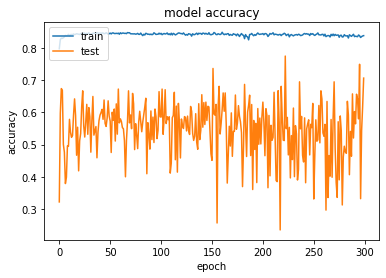

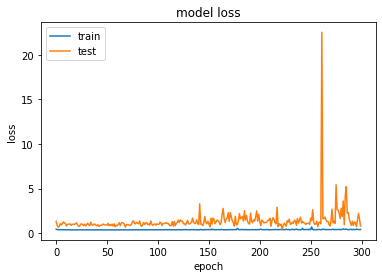

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()